# **A. Phát hiện trang web lừa đảo bằng kỹ thuật học máy**
***(Phishing Website Detection by Machine Learning Techniques)***

# **1. Mục tiêu:**
Website lừa đảo (phishing website) là một tấn công phi kỹ thuật (social engineering) bằng cách bắt chước các URL tin cậy. Mục tiêu bài thực hành sẽ đào tạo mô hình học máy và học sâu trên tập dữ liệu để dự đoán website lừa đảo. Cả 2 URL lừa đảo và lành tính (benign) được trích xuất thuộc tình từ thành phần cơ bản của website thành tập dữ liệu.
Dataset sử dụng trong Colab_Notebooks: https://drive.google.com/drive/folders/18CI5SXdvZEIhG1rWLm8yjVIdSI4Q2lPx?usp=drive_link

# **2. Tải dữ liệu**
Các tính năng được trích xuất và lưu trữ trong tập tin csv.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import ackages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
#Loading the data
data_dir = '/content/drive/MyDrive/Colab_Notebooks'
data = pd.read_csv(data_dir + '/urldata.csv')

# **3. Làm quen với dữ liệu**
Dùng Dataframe để xem qua dữ liệu.

In [4]:
#Check shape
data.shape

(10000, 18)

In [5]:
#List features
data.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [6]:
#Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

# **4. Trực quan hóa dữ liệu**
Một số biểu đồ hiển thị để tìm các phân phối dữ liệu và các mối liên quan với nhau giữa các đối tượng.

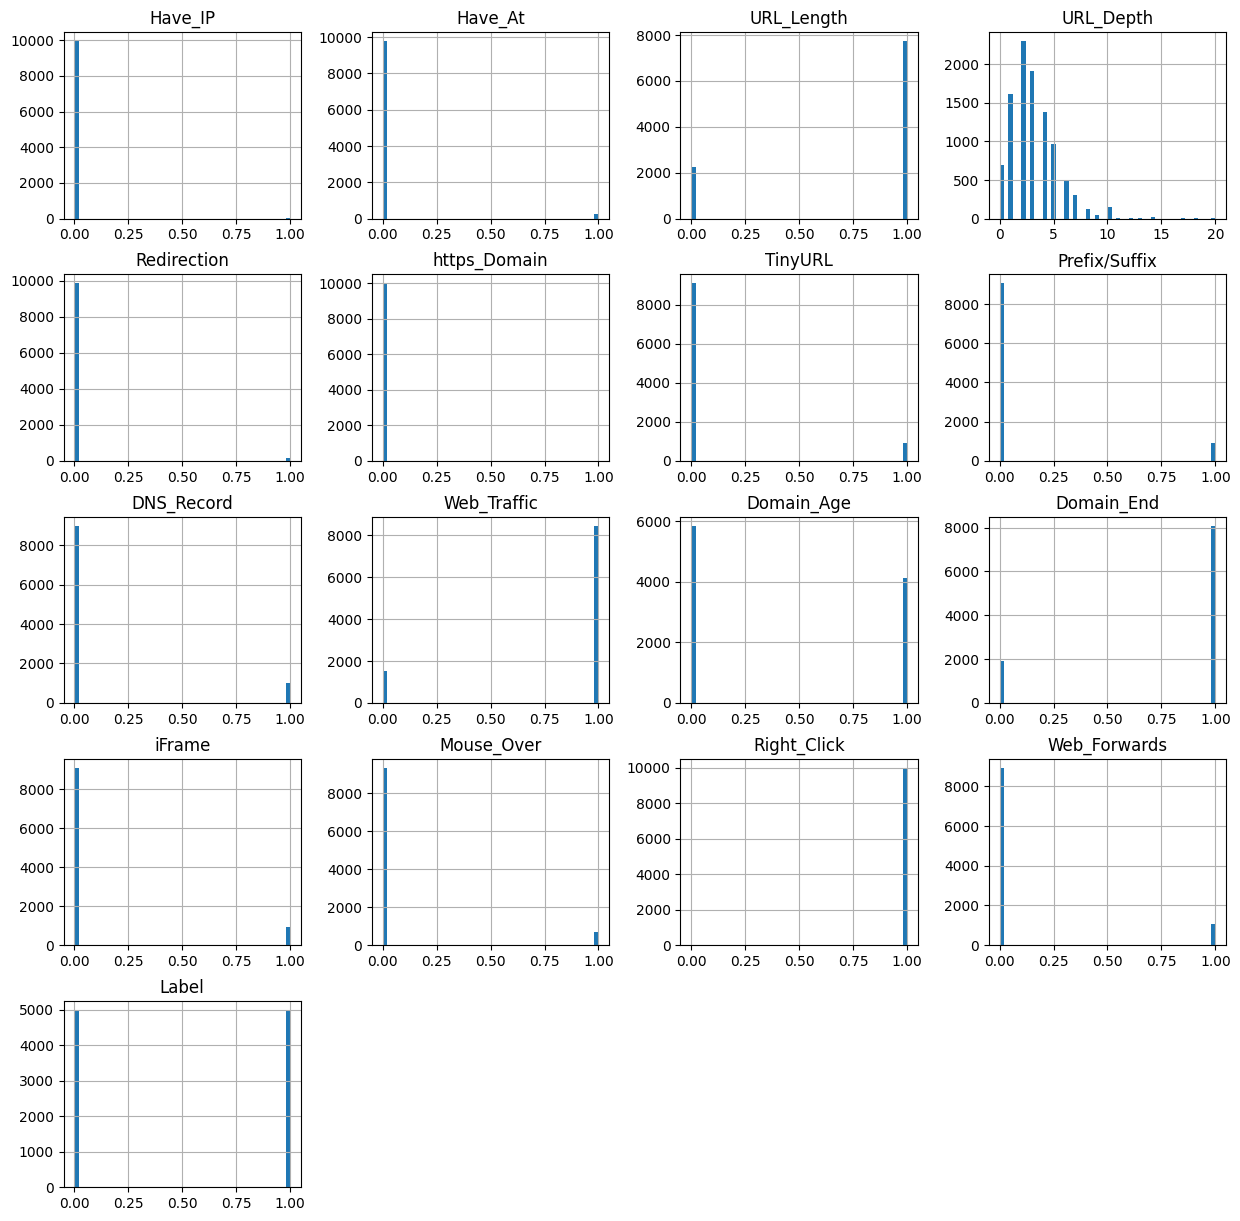

In [7]:
#Plotting the data distribution
data.hist(bins = 50,figsize = (15,15))
plt.show()

Domain           object
Have_IP           int64
Have_At           int64
URL_Length        int64
URL_Depth         int64
Redirection       int64
https_Domain      int64
TinyURL           int64
Prefix/Suffix     int64
DNS_Record        int64
Web_Traffic       int64
Domain_Age        int64
Domain_End        int64
iFrame            int64
Mouse_Over        int64
Right_Click       int64
Web_Forwards      int64
Label             int64
dtype: object


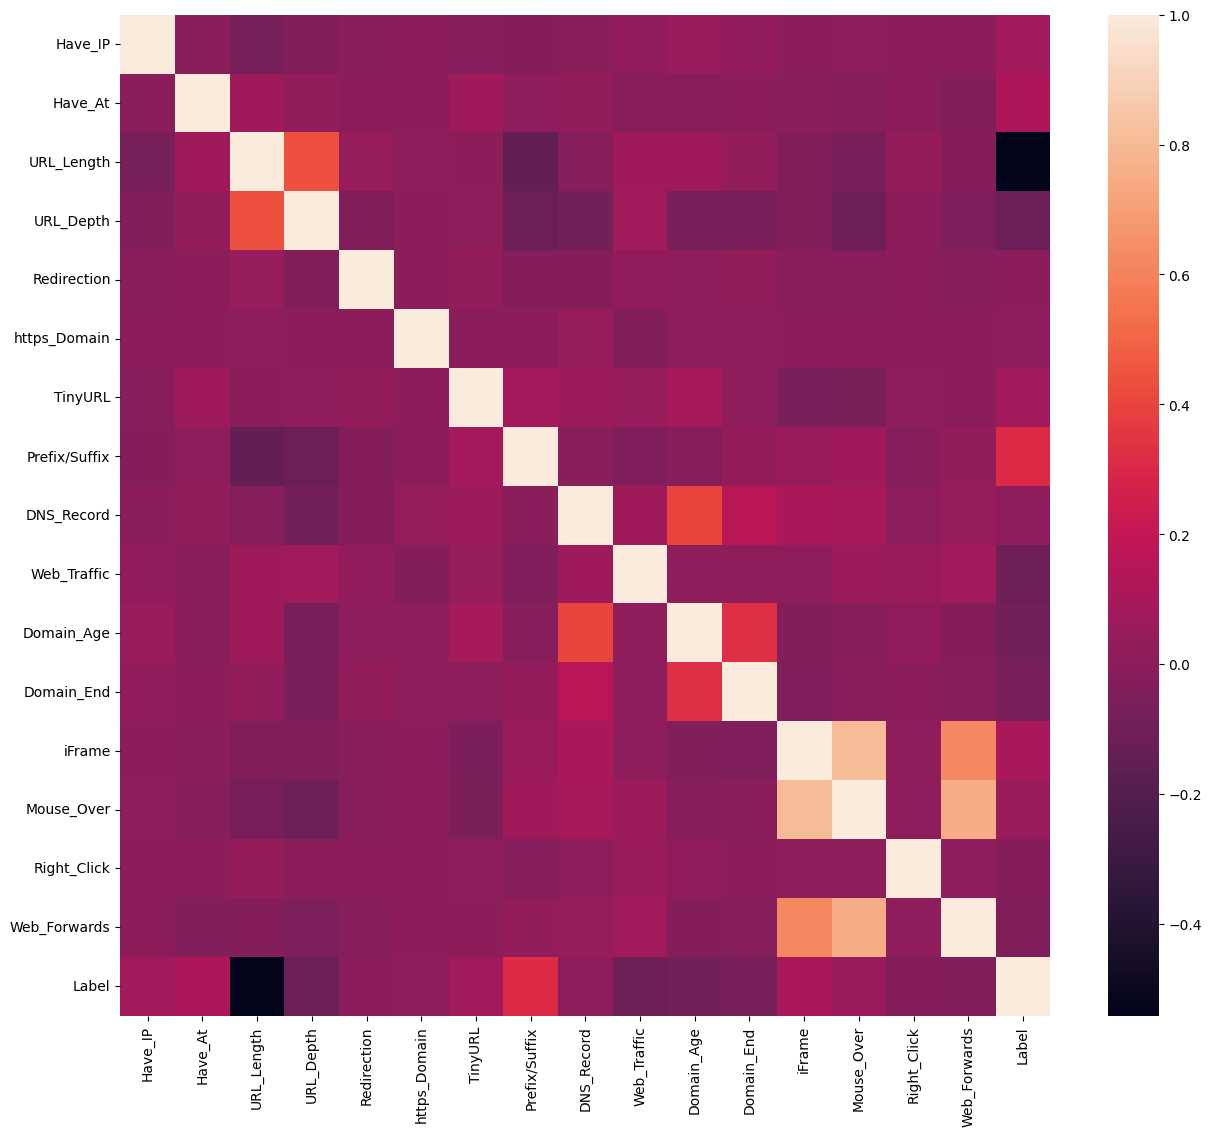

In [8]:
#Correlation heatmap
print(data.dtypes)
plt.figure(figsize=(15,13))
data_numeric = data.select_dtypes(include='number') # Remove non-numeric columns: Create a new DataFrame data_numeric that only contains the numeric columns, and then plot the correlation heatmap using that.
sns.heatmap(data_numeric.corr())
# sns.heatmap(data.corr())
plt.show()

# **5. Tiền xử lý dữ liệu & EDA**
Làm sạch dữ liệu bằng cách áp dụng các kỹ thuật tiền xử lý dữ liệu và chuyển đổi dữ liệu để sử dụng nó trong các mô hình.

In [9]:
data.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


Kết quả thu được ở trên cho thấy rằng hầu hết dữ liệu được tạo từ 0 và 1, ngoại trừ cột 'Domain' & 'URL_Depth'. Cột Domain hoàn toàn không có ý nghĩa gì để đào tạo mô hình nên loại nó.

In [10]:
#Drop Domain column
data = data.drop(['Domain'], axis = 1).copy()

Ta còn lại 16 thuộc tính và 1 cột phân loại. Giá trị tối đa của 'URL_Depth'  là 20. Ta cần chuẩn hoá cột này.

In [11]:
#check data null
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

Trong tập tin thuộc tính được trích xuất, các thuộc tính được trích xuất của tập url lừa đảo và lành tính không có bất kỳ xáo trộn nào.

In [12]:
# shuffling the rows
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1,1,1
1,0,0,1,6,0,0,0,0,0,1,0,1,0,0,1,0,1
2,0,0,1,3,0,0,0,0,0,1,1,1,0,0,1,0,0
3,0,0,1,5,0,0,0,0,0,1,1,1,0,0,1,0,1
4,0,0,1,7,0,0,1,0,0,1,0,0,0,0,1,1,0


# **6. Chia dữ liệu**

In [13]:
#features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [14]:
# train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

# **7. Đào tạo mô hình học máy**
Dữ liệu phù hợp với việc học có giám sát và hai bài toán nên áp dụng là classification - phân loại và regression - hồi quy.
Ta sẽ có 2 nhãn  phishing (1) và legitimate (0), với các mô hình học giám sát sau:
*  Decision Tree
*  Random Forest
* Support Vector Machines

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
# Creating model results
ML_Model = []
acc_train = []
acc_test = []

#storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

## **7.1 Decision Tree Classifier**

In [17]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier
# instantiate
tree = DecisionTreeClassifier(max_depth = 5)
# fit
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [18]:
#predicting
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

***Đánh giá hiệu suất***

In [19]:
#computing the accuracy
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.808
Decision Tree: Accuracy on test Data: 0.826


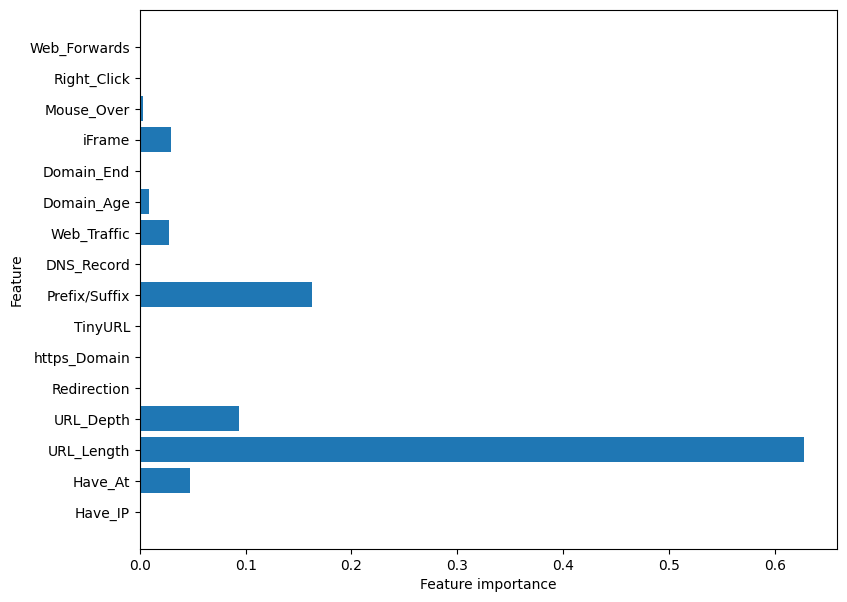

In [20]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Lưu trữ kết quả**

In [21]:
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

## **7.2 Random Forest Classifier**

In [22]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
# instantiate
forest = RandomForestClassifier(max_depth=5)
# fit
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [23]:
#predicting
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Đánh giá hiệu suất**

In [24]:
#computing the accuracy
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.813
Random forest: Accuracy on test Data: 0.827


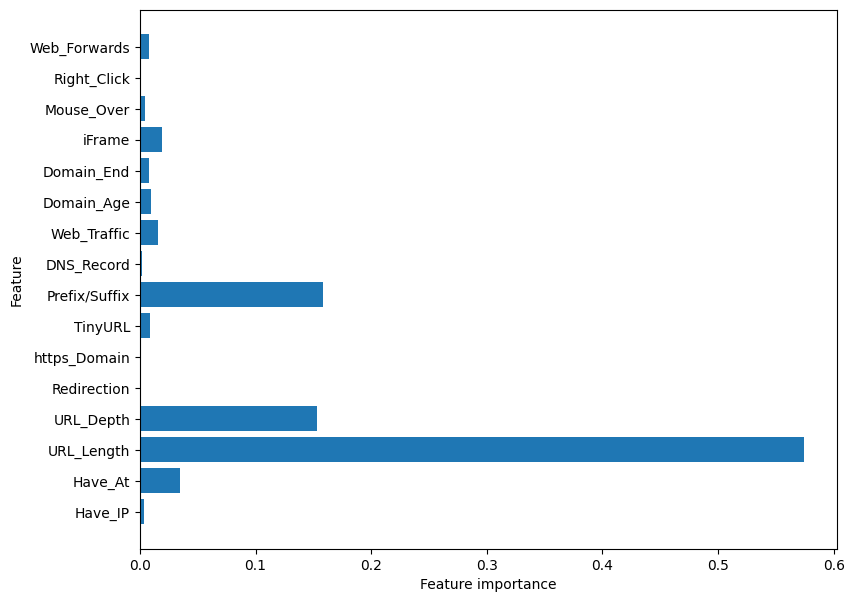

In [25]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Lưu trữ kết quả**

In [26]:
storeResults('Random Forest', acc_train_forest, acc_test_forest)

## **7.6. Support Vector Machines**


In [27]:
# SVM model
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [28]:
# Instantiate the model
svm = SVC(kernel='linear')

In [29]:
# Fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [30]:
# Make predictions
y_test_svm = svm.decision_function(X_test)
y_train_svm = svm.decision_function(X_train)

In [31]:
# Compute the accuracy
acc_train_svm = accuracy_score(y_train, (y_train_svm > 0).astype(int))
acc_test_svm = accuracy_score(y_test, (y_test_svm > 0).astype(int))
print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM: Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.799
SVM: Accuracy on test Data: 0.815


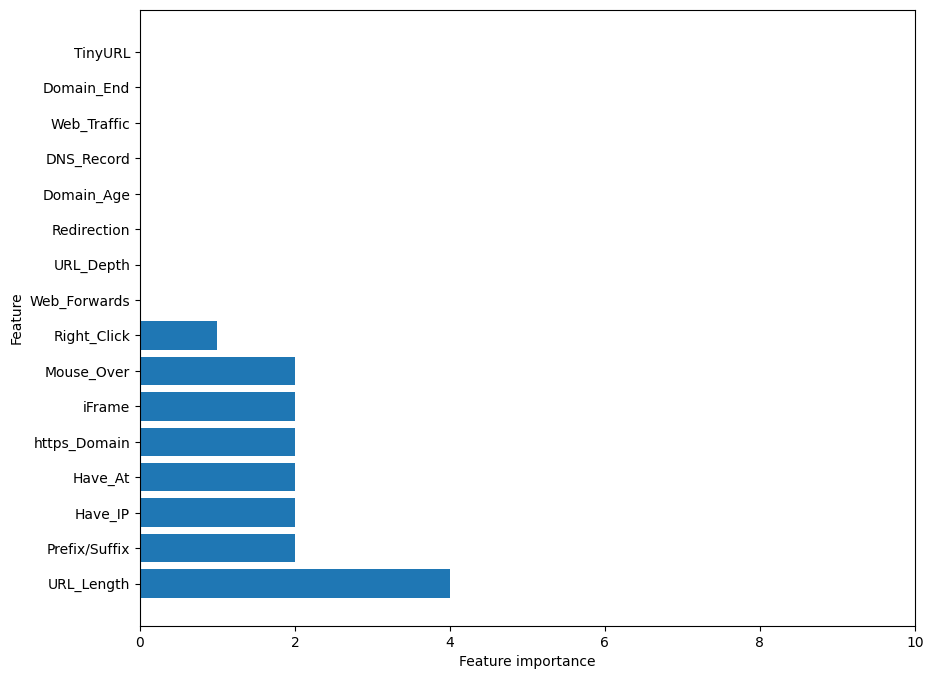

In [32]:
# Check the feature importance in the model
plt.figure(figsize=(10, 8))
feature_importances = np.abs(svm.coef_[0])
sorted_importances = sorted(zip(X_train.columns, feature_importances), key=lambda x: x[1], reverse=True)
plt.barh(range(len(sorted_importances)), [x[1] for x in sorted_importances], align='center')
plt.yticks(np.arange(len(sorted_importances)), [x[0] for x in sorted_importances])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.xlim(0, 10)  # Set the x-axis limits to start from 0.0
plt.show()

In [33]:
# Store the results
storeResults('SVM', acc_train_svm, acc_test_svm)

# **8. So sánh các mô hình**

In [34]:
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
print(results)

        ML Model  Train Accuracy  Test Accuracy
0  Decision Tree           0.808          0.826
1  Random Forest           0.813          0.827
2            SVM           0.799          0.815


In [35]:
#Sort accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
1,Random Forest,0.813,0.827
0,Decision Tree,0.808,0.826
2,SVM,0.799,0.815


# **9. Lưu trữ mô hình**

In [36]:
# Save the models
import pickle

# Save Decision Tree model
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(tree, file)

# Save Random Forest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(forest, file)

# Save SVM model
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svm, file)

# **10. Trích dẫn**
https://blog.keras.io/building-autoencoders-in-keras.html
https://en.wikipedia.org/wiki/Autoencoder
https://mc.ai/a-beginners-guide-to-build-stacked-autoencoder-and-tying-weights-with-it/
https://github.com/shreyagopal/t81_558_deep_learning/blob/master/t81_558_class_14_03_anomaly.ipynb
https://machinelearningmastery.com/save-gradient-boosting-models-xgboost-python/

# **B. Trích xuất thuộc tính trang web lừa đảo**
***(Phishing Website Detection Feature Extraction)***

# **1. Thu thập dữ liệu**
Ta cần 2 nhãn: hợp pháp - legitimate (0) và lừa đảo - phishing (1).
Việc thu thập các url lừa đảo khá dễ dàng do nguồn mở có tên PhishTank. Dịch vụ này cung cấp một tập hợp các URL lừa đảo ở nhiều định dạng như csv, json, v.v. được cập nhật hàng giờ. Để tải xuống dữ liệu: https://www.phishtank.com/developer_info.php
Đối với các url hợp pháp, nguồn từ trường ĐH New Brunswick có sẵn các dạng benign, spam, phishing, malware & defacement URL  https://www.unb.ca/cic/datasets/url-2016.html. Số lượng URL hợp pháp là 35,300 'Benign_list.csv'

## **1.1. Phishing URLs:**

In [ ]:
import pandas as pd

In [ ]:
#Download phishing URLs
!wget http://data.phishtank.com/data/online-valid.csv

--2024-05-18 06:12:27--  http://data.phishtank.com/data/online-valid.csv
Resolving data.phishtank.com (data.phishtank.com)... 104.17.244.239, 104.17.243.239, 2606:4700::6811:f3ef, ...
Connecting to data.phishtank.com (data.phishtank.com)|104.17.244.239|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://data.phishtank.com/data/online-valid.csv [following]
--2024-05-18 06:12:27--  https://data.phishtank.com/data/online-valid.csv
Connecting to data.phishtank.com (data.phishtank.com)|104.17.244.239|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn.phishtank.com/datadumps/verified_online.csv?Expires=1716012547&Signature=h-7rgyi7PpzRi8L3sMFXfk8b5CyMy2LQr3hfr1clip287uCCyK3xEdM7QMgUnlAPDwEy-B6KDbXYSvVVviQCEAHXkYnlv4oRIlix1abpDm-LtCh68VeJyX8ENgGTwYpLMbxFvZaceCTZNAgZOBIkpoZ~p~LrAKSPoTQCbRjqUPl5HgBtQLZIABQK1Y9GWbdZVStZJr3JQS2yNJFZgyZSP3w3vpkubsrr2kQpmktERR5Jfz42jZKfmqtdkZGjUE6sLc47mrfVTQfv8nD5icv7~VjSLXI9~kt-w

In [ ]:
#Load CSV
data = pd.read_csv("online-valid.csv")
data.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,8579625,https://www.accouappel.accoutenness.com/,http://www.phishtank.com/phish_detail.php?phis...,2024-05-18T01:01:28+00:00,yes,2024-05-18T01:13:25+00:00,yes,Apple
1,8579566,https://1r5plyaccp.com/?verify,http://www.phishtank.com/phish_detail.php?phis...,2024-05-17T22:38:25+00:00,yes,2024-05-18T00:11:07+00:00,yes,Internal Revenue Service
2,8579565,https://sl.ut.ac.id/22ia,http://www.phishtank.com/phish_detail.php?phis...,2024-05-17T22:36:46+00:00,yes,2024-05-18T00:11:07+00:00,yes,Internal Revenue Service
3,8579541,https://me2.do/GLSgGfnm?userid=tCCGH6sL,http://www.phishtank.com/phish_detail.php?phis...,2024-05-17T22:11:58+00:00,yes,2024-05-18T00:11:07+00:00,yes,Internal Revenue Service
4,8579474,https://return-wheres-get_refund-faster-deposi...,http://www.phishtank.com/phish_detail.php?phis...,2024-05-17T20:40:12+00:00,yes,2024-05-18T00:11:07+00:00,yes,Internal Revenue Service


In [ ]:
data.shape

(59843, 8)

Chọn ngẫu nhiên 5000 mẫu.

In [ ]:
phishurl = data.sample(n = 5000, random_state = 12).copy()
phishurl = phishurl.reset_index(drop=True)
phishurl.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,8331410,https://pub-8ba2818cd4be4fbbbe1f73a378c6cdb9.r...,http://www.phishtank.com/phish_detail.php?phis...,2023-10-13T23:59:00+00:00,yes,2023-10-14T00:10:27+00:00,yes,Other
1,8455791,https://tools.usps-trackmtlcedq.top/,http://www.phishtank.com/phish_detail.php?phis...,2024-02-18T18:03:40+00:00,yes,2024-02-18T18:11:44+00:00,yes,Other
2,8321404,https://aol-100463.weeblysite.com/,http://www.phishtank.com/phish_detail.php?phis...,2023-10-05T17:54:34+00:00,yes,2023-10-05T18:52:01+00:00,yes,Other
3,8059554,https://mail-106567.square.site/,http://www.phishtank.com/phish_detail.php?phis...,2023-03-04T08:27:17+00:00,yes,2023-03-04T08:44:57+00:00,yes,Other
4,7560815,https://domappcheckomeg25.firebaseapp.com/,http://www.phishtank.com/phish_detail.php?phis...,2022-06-21T00:03:37+00:00,yes,2022-06-21T00:12:56+00:00,yes,Other


In [ ]:
phishurl.shape

(5000, 8)

## **1.2. Legitimate URLs:**

In [ ]:
#Load legitimate files
data = pd.read_csv(data_dir + "/Benign_list.csv")
data.columns = ['URLs']
data.head()

,URLs
0,http://1337x.to/torrent/1110018/Blackhat-2015-...
1,http://1337x.to/torrent/1122940/Blackhat-2015-...
2,http://1337x.to/torrent/1124395/Fast-and-Furio...
3,http://1337x.to/torrent/1145504/Avengers-Age-o...
4,http://1337x.to/torrent/1160078/Avengers-age-o...


In [ ]:
#Collect 5,000 Legitimate URLs randomly
legiurl = data.sample(n = 5000, random_state = 12).copy()
legiurl = legiurl.reset_index(drop=True)
legiurl.head()

,URLs
0,http://graphicriver.net/search?date=this-month...
1,http://ecnavi.jp/redirect/?url=http://www.cros...
2,https://hubpages.com/signin?explain=follow+Hub...
3,http://extratorrent.cc/torrent/4190536/AOMEI+B...
4,http://icicibank.com/Personal-Banking/offers/o...


In [ ]:
legiurl.shape

(5000, 1)

# **2. Trích xuất thuộc tính**
Các thuộc tính sẽ được trích xuất phân loại thành:
* Address Bar
* Domain
* HTML & Javascript

## **2.1 Thuộc tính Address Bar**
Ta chỉ chọn một số thuộc tính cơ bản sau:
* Domain of URL
* IP Address in URL
* "@" Symbol in URL
* Length of URL
* Depth of URL
* Redirection "//" in URL
* "http/https" in Domain name
* Using URL Shortening Services “TinyURL”
* Prefix or Suffix "-" in Domain

In [ ]:
from urllib.parse import urlparse,urlencode
import ipaddress
import re

In [ ]:
# 1.Domain
def getDomain(url):
  domain = urlparse(url).netloc
  if re.match(r"^www.",domain):
	       domain = domain.replace("www.","")
  return domain

In [ ]:
# 2.Have_IP
def havingIP(url):
  try:
    ipaddress.ip_address(url)
    ip = 1
  except:
    ip = 0
  return ip

In [ ]:
# 3.Have_At (@)
def haveAtSign(url):
  if "@" in url:
    at = 1
  else:
    at = 0
  return at

In [ ]:
# 4.URL_Length
def getLength(url):
  if len(url) < 54:
    length = 0
  else:
    length = 1
  return length

In [ ]:
# 5.URL_Depth '/'
def getDepth(url):
  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth

In [ ]:
# 6.Redirection '//'
def redirection(url):
  pos = url.rfind('//')
  if pos > 6:
    if pos > 7:
      return 1
    else:
      return 0
  else:
    return 0

In [ ]:
# 7. https_Domain
def httpDomain(url):
  domain = urlparse(url).netloc
  if 'https' in domain:
    return 1
  else:
    return 0

In [ ]:
# 8. Checking Tiny_URL
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0

In [ ]:
# 9.Check Prefix or Suffix "-" in Domain
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return 1            # phishing
    else:
        return 0            # legitimate

## **2.2 Thuộc tính Domain**
Các thể loại thuộc tính được trích xuất:
* DNS Record
* Website Traffic
* Age of Domain
* End Period of Domain

In [ ]:
!pip install python-whois

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 995.2 kB/s eta 0:00:00


In [ ]:
!pip install tldextract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 1.2 MB/s eta 0:00:00


In [ ]:
!pip install resolver

  Preparing metadata (setup.py) ... done
  Created wheel for resolver: filename=resolver-0.2.1-py3-none-any.whl size=12153 sha256=3f0a8fec361d92c9c53c42916229847da2dc851472b558aee0c5aa669679388a
  Stored in directory: /root/.cache/pip/wheels/ca/a6/39/9b524a5919ed8d5fe28087d5abe884b98de7ba4c2726ab458b
Successfully built resolver


In [ ]:
import re
from bs4 import BeautifulSoup
import whois
import urllib
import urllib.request
from datetime import datetime

In [ ]:
# 11.DNS_Record
# obtained in the featureExtraction function
import tldextract
import whois
import datetime

def feature_extraction_dns(domain):
    """
    Thực hiện feature extraction trên một miền DNS.

    Tham số:
    domain (str): Miền DNS cần được phân tích.

    Trả về:
    dict: Một từ điển chứa các tính năng được trích xuất.
    """
    features = {}

    # Trích xuất thông tin từ miền
    parsed_domain = tldextract.extract(domain)
    features['subdomain'] = parsed_domain.subdomain
    features['domain'] = parsed_domain.domain
    features['tld'] = parsed_domain.suffix

    # Trích xuất thông tin WHOIS
    try:
        whois_info = whois.whois(domain)
        features['creation_date'] = whois_info.creation_date
        features['expiration_date'] = whois_info.expiration_date
        features['registrar'] = whois_info.registrar
    except:
        features['creation_date'] = None
        features['expiration_date'] = None
        features['registrar'] = None

    # Tính toán các tính năng khác
    features['domain_length'] = len(domain)
    features['num_subdomains'] = len(parsed_domain.subdomain.split('.'))
    features['age'] = (datetime.datetime.now() - features['creation_date']).days if features['creation_date'] else None

    return features

In [ ]:
#Nếu thứ hạng của doamin <100000, giá trị của tính năng này là 1 (lừa đảo), còn không thì là 0 (hợp pháp).
# 12.Web traffic
def web_traffic(url):
  try:
    #Fill whitespaces URL if any
    url = urllib.parse.quote(url)
    rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find(
        "REACH")['RANK']
    rank = int(rank)
  except TypeError:
        return 1
  if rank <100000:
    return 1
  else:
    return 0

In [ ]:
#Nếu age of domain > 12 tháng, giá trị của tính năng này là 1 (lừa đảo), còn không thì là 0 (hợp pháp)
# 13.Survival time of domain (Domain_Age)
def domainAge(domain_name):
  creation_date = domain_name.creation_date
  expiration_date = domain_name.expiration_date
  if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
    try:
      creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if ((expiration_date is None) or (creation_date is None)):
      return 1
  elif ((type(expiration_date) is list) or (type(creation_date) is list)):
      return 1
  else:
    ageofdomain = abs((expiration_date - creation_date).days)
    if ((ageofdomain/30) < 6):
      age = 1
    else:
      age = 0
  return age

In [ ]:
# Nếu period of domain > 6 tháng, giá trị của tính năng này là 1 (lừa đảo), còn không thì là 0 (hợp pháp)
# 14.End time of domain (Domain_End)
def domainEnd(domain_name):
  expiration_date = domain_name.expiration_date
  if isinstance(expiration_date,str):
    try:
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if (expiration_date is None):
      return 1
  elif (type(expiration_date) is list):
      return 1
  else:
    today = datetime.now()
    end = abs((expiration_date - today).days)
    if ((end/30) < 6):
      end = 0
    else:
      end = 1
  return end

In [ ]:
def domainEnd(domain_name):
    expiration_date = domain_name.expiration_date
    if isinstance(expiration_date,str):
        try:
            expiration_date = datetime.datetime.strptime(expiration_date,"%Y-%m-%d")
        except:
            return 1
    if (expiration_date is None):
        return 1
    elif (type(expiration_date) is list):
        return 1
    else:
        today = datetime.datetime.now()
        end = abs((expiration_date - today).days)
        if ((end/30) < 6):
            end = 0
        else:
            end = 1
        return end

## **2.3 Thuộc tính HTML and JavaScript**
Các tập thuộc tính được trích xuất sau:
* IFrame Redirection
* Status Bar Customization
* Disabling Right Click
* Website Forwarding

In [ ]:
import requests

In [ ]:
# 15. IFrame
def iframe(response):
  if response == "":
      return 1
  else:
      if re.findall(r"[<iframe>|<frameBorder>]", response.text):
          return 0
      else:
          return 1

In [ ]:
# 16.Check Mouse_Over
def mouseOver(response):
  if response == "" :
    return 1
  else:
    if re.findall("<script>.+onmouseover.+</script>", response.text):
      return 1
    else:
      return 0

In [ ]:
# 17.Check Right_Click
def rightClick(response):
  if response == "":
    return 1
  else:
    if re.findall(r"event.button ?== ?2", response.text):
      return 0
    else:
      return 1

In [ ]:
# 18.Check Web_Forwards
def forwarding(response):
  if response == "":
    return 1
  else:
    if len(response.history) <= 2:
      return 0
    else:
      return 1

# **3. Tính toán thuộc tính URLs**
Tạo danh sách và một hàm gọi các hàm khác và lưu trữ tất cả các thuộc tính của URL vào list.

In [ ]:
def featureExtraction(url,label):

  features = []
  #Address bar features (10)
  features.append(getDomain(url))
  features.append(havingIP(url))
  features.append(haveAtSign(url))
  features.append(getLength(url))
  features.append(getDepth(url))
  features.append(redirection(url))
  features.append(httpDomain(url))
  features.append(tinyURL(url))
  features.append(prefixSuffix(url))

  #Domain features (4)
  dns = 0
  try:
    domain_name = whois.whois(urlparse(url).netloc)
  except:
    dns = 1

  features.append(dns)
  features.append(web_traffic(url))
  features.append(1 if dns == 1 else domainAge(domain_name))
  features.append(1 if dns == 1 else domainEnd(domain_name))

  # HTML & Javascript features (4)
  try:
    response = requests.get(url)
  except:
    response = ""
  features.append(iframe(response))
  features.append(mouseOver(response))
  features.append(rightClick(response))
  features.append(forwarding(response))
  features.append(label)

  return features

## **3.1 URL hợp pháp**

In [ ]:
legiurl.shape

(5000, 1)

In [ ]:
legi_features = []
label = 0

for i in range(0, 5000):
  url = legiurl['URLs'][i]
  legi_features.append(featureExtraction(url,label))

URLError: <urlopen error [Errno -2] Name or service not known>

In [ ]:
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection',
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic',
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards', 'Label']

legitimate = pd.DataFrame(legi_features, columns= feature_names)
legitimate.head()

In [ ]:
legitimate.to_csv('legitimate.csv', index= False)

## **3.2 URL lừa đảo**

In [ ]:
phishurl.shape

In [ ]:
phish_features = []
label = 1
for i in range(0, 5000):
  url = phishurl['url'][i]
  phish_features.append(featureExtraction(url,label))

In [ ]:
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection',
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic',
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards', 'Label']

phishing = pd.DataFrame(phish_features, columns= feature_names)
phishing.head()

In [ ]:
phishing.to_csv('phishing.csv', index= False)

# **4. Datasets**

In [ ]:
urldata = pd.concat([legitimate, phishing]).reset_index(drop=True)
urldata.head()

In [ ]:
urldata.tail()

In [ ]:
urldata.shape

In [ ]:
urldata.to_csv('urldata.csv', index=False)

Ta trích xuất được 18 thuộc tính với 10,000 rows trong đó có  5000 phishing  & 5000 legitimate URL

# **5. Trích dẫn**

https://archive.ics.uci.edu/ml/datasets/Phishing+Websites